In [2]:
import fitting

In [ ]:
import numpy as np
import os
from scipy import signal
# import UDIP_Lib.UDIP_Lib_V19 as UDIP_Lib  #making updating UDIP_Lib easier
import Fitting.RockSat_1_14_fitting_functions as R_fitting
import json
import pandas as pd
import matplotlib.pyplot as plt
from RockSat_json.RockSat_json import *
# from pckt import *


path = f'../data/json/UDIP_4_800s.json'
figs = '../figs/'

file = pd.read_json(path)

FileNotFoundError: File ../data/json/UDIP_4_800s.json does not exist

In [ ]:
import numpy as np
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

class pck:
    def __init__(self, file, num, sw_type):
        self.path = path
        self.num = num
        self.sw_type = sw_type
        # file = pd.read_json(path)
        data = file['packets'][sw_type][f'{self.num}']
        self.num_full = len(file['packets']['Full'])
        self.num_dense = len(file['packets']['Dense'])
        self.data = data
        self.start = data['Start']/1000
        self.stop  = data['Stop']/1000
        self.grnd = data['GroundType']
        self.iv = pd.DataFrame({
                    'V': np.array(self.data['Voltage'][6:]), 
                    'I0': -np.array(self.data['Current0'][6:]), 
                    'I1': -np.array(self.data['Current1'][6:]), 
                    'I2': -np.array(self.data['Current2'][6:])
                    })
    def VP(self):
        self.iv['dI_dV'] = np.abs(self.iv['I0'].rolling(5).mean().diff())
        ind = self.iv['dI_dV'].argmax()
        return self.iv['V'].rolling(5).mean()[ind]
    def Vf(self):
        sign = np.where((np.diff(np.sign(self.iv['I0'].rolling(5).mean())) !=0))[0]
        Vf = np.max(self.iv['V'][sign][self.iv['V'] < self.VP()])
        return Vf

2.4171554252199425 1.9156891495601172


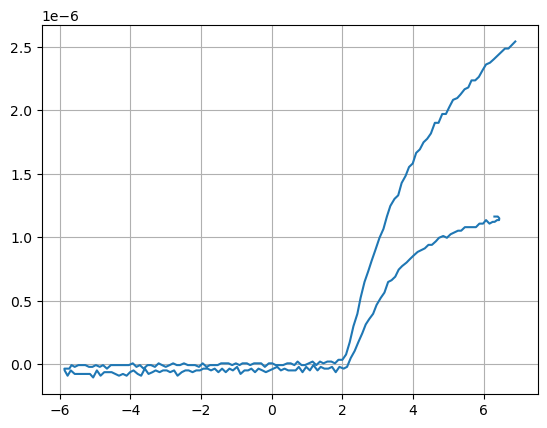

In [ ]:
myp = pck(file, 255, 'Full')
iv = myp.iv
plt.plot(iv['V'], iv['I0'])
plt.grid()
print(myp.VP(), myp.Vf())

-5.834750733137829 nan


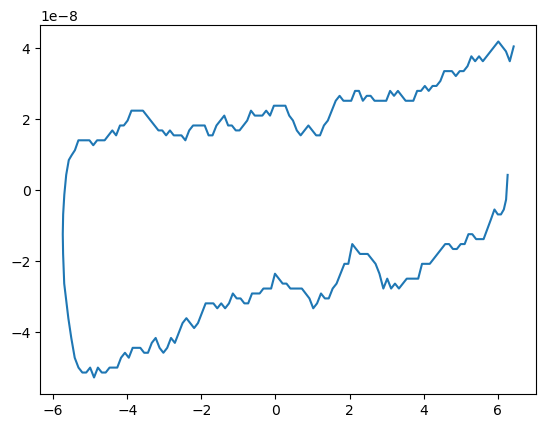

In [ ]:
myp = pck(file, 600, 'Full')
iv = myp.iv
plt.plot(iv['V'].rolling(10).mean(), iv['I0'].rolling(10).mean())

print(myp.VP(), myp.Vf())

In [ ]:
# file_path = 'IV_400.csv'
# iv = pd.read_csv(file_path, index_col = 0)[6:]
data = pck(file, 260, 'Full')
iv = data.iv
# iv.reset_index(inplace= True)
# iv['Current'] = -iv['Current']

In [ ]:
print(data.num_full)

903


In [ ]:
Vf = np.array([])
VP = np.array([])
for i in np.arange(data.num_full):
    data = pck(file, i, 'Full')
    Vf = np.append(Vf, data.Vf())
    VP = np.append(VP, data.VP())

In [ ]:
print(Vf[175:450])

[ 2.13159824  2.03409091  2.0271261   1.92265396  2.03409091  2.13856305
  1.71370968  1.91568915  1.91568915  1.90872434  2.0271261   1.91568915
  1.91568915  2.03409091  1.90872434  1.90872434  2.03409091  1.90872434
  1.90872434  1.91568915  1.91568915  2.03409091  1.81818182  1.81818182
  1.81818182  1.91568915  1.91568915  1.81818182  1.91568915  1.91568915
  1.90872434  1.90872434  1.81818182  1.81818182  1.81818182  1.90872434
  1.82514663  1.91568915  1.91568915  1.81818182  1.81818182  1.81818182
  1.81818182  1.82514663  1.92265396  1.91568915  1.82514663  1.81818182
  1.81818182  1.81818182  1.90872434  1.90872434  1.82514663  1.81818182
  1.81818182  1.81818182  1.81121701  1.81818182  1.70674487  1.81818182
  1.81818182  1.82514663  1.81818182  1.81818182  1.81818182  1.81121701
  1.81818182  1.81121701  1.90175953  1.81121701  1.81818182  1.81818182
  1.81818182  1.81818182  1.91568915  1.90872434  1.70674487  1.81818182
  1.81818182  1.90872434  1.91568915  2.0271261   1

(175.0, 480.0)

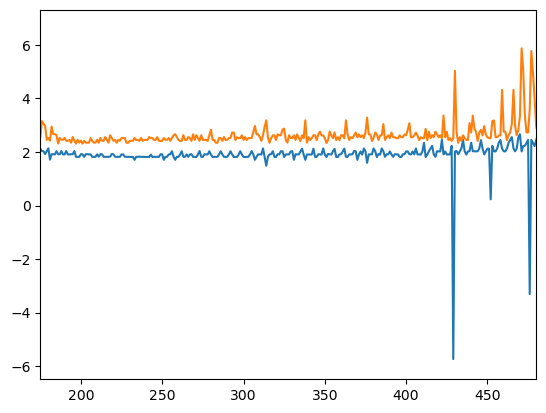

In [ ]:
plt.plot(Vf)
plt.plot(VP)
plt.xlim(175, 480)

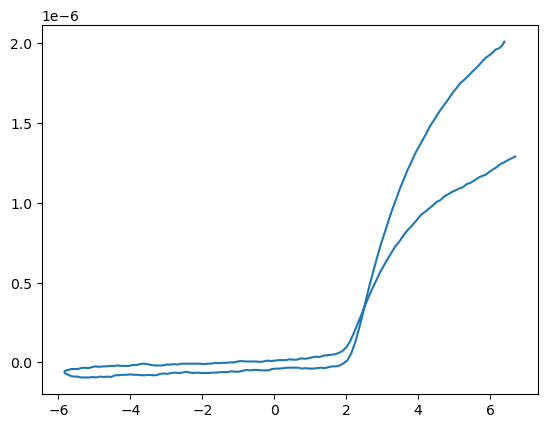

In [ ]:
plt.plot(iv['V'].rolling(7).mean(), iv['I0'].rolling(7).mean())

In [ ]:
print(iv.iloc[0:50])

           V            I0            I1            I2
0   6.303519  1.991935e-06  1.173570e-06  5.940982e-08
1   6.394062  2.033724e-06  1.173570e-06  5.947947e-08
2   6.449780  2.033724e-06  1.173570e-06  5.944465e-08
3   6.435850  2.019795e-06  1.172874e-06  5.947947e-08
4   6.387097  1.964076e-06  1.173570e-06  5.944465e-08
5   6.317449  2.005865e-06  1.172874e-06  5.937500e-08
6   6.240836  1.964076e-06  1.173570e-06  5.940982e-08
7   6.164223  1.950147e-06  1.172874e-06  5.937500e-08
8   6.073680  1.950147e-06  1.173570e-06  5.937500e-08
9   5.983138  1.936217e-06  1.173570e-06  5.940982e-08
10  5.885630  1.908358e-06  1.172874e-06  5.944465e-08
11  5.781158  1.880499e-06  1.173570e-06  5.940982e-08
12  5.697581  1.880499e-06  1.173570e-06  5.940982e-08
13  5.586144  1.838710e-06  1.173570e-06  5.947947e-08
14  5.467742  1.796921e-06  1.172177e-06  5.944465e-08
15  5.377199  1.796921e-06  1.172874e-06  5.940982e-08
16  5.272727  1.769062e-06  1.173570e-06  5.944465e-08
17  5.1612

In [ ]:
iv['dI_dV'] = np.abs(iv['I0'].rolling(5).mean().diff())

print(iv['dI_dV'])

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
245    1.950147e-08
246    1.114370e-08
247    1.392962e-08
248    1.114370e-08
249    1.114370e-08
Name: dI_dV, Length: 250, dtype: float64


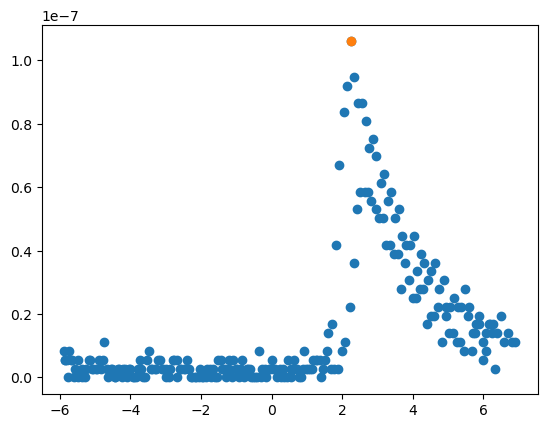

In [ ]:
plt.scatter(iv['V'], iv['dI_dV'])
ind = iv['dI_dV'].argmax()
plt.scatter(iv['V'][ind], iv['dI_dV'][ind])

In [ ]:
iv.diff()['I0']

0               NaN
1      4.178886e-08
2      0.000000e+00
3     -1.392962e-08
4     -5.571848e-08
           ...     
245    1.392962e-08
246    0.000000e+00
247    2.785924e-08
248    1.392962e-08
249    0.000000e+00
Name: I0, Length: 250, dtype: float64

In [ ]:
sign_roll = np.where((np.diff(np.sign(iv['I0'].rolling(2).mean())) !=0))[0]
sign = np.where((np.diff(np.sign(iv['I0'])) !=0))[0]
print(sign_roll)
print(sign)
# ind = iv[np.sign(iv.diff()['I0']) !=0]
# print(ind)


[  0  47 160 161 171 176 178]
[ 46  49  50 146 147 148 149 153 154 155 156 159 161 164 165 166 167 168
 169 170 176 177]


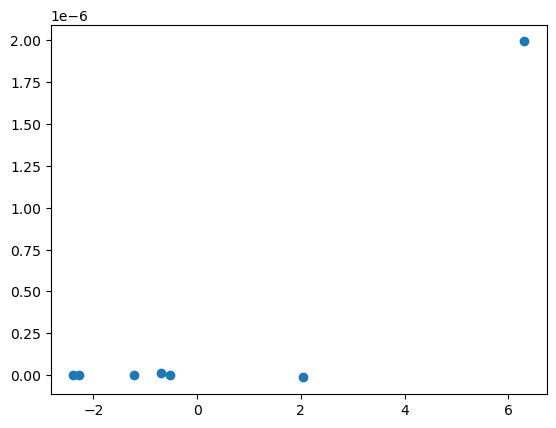

In [ ]:
plt.scatter(iv['V'][sign_roll], iv['I0'][sign_roll])
# plt.scatter(iv['V'][sign], iv['I0'][sign])

In [ ]:
np.average(iv['V'][sign_roll][iv['V'] < data.VP()])

/home/goodwill/.conda/envs/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/goodwill/.conda/envs/conda/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

In [ ]:
low = np.argmin(np.abs(iv['V'][sign]))
iv['V'][sign[low]]

-0.6125366568914961

In [ ]:
print(data.Vf())
print(data.VP())

nan
-5.834750733137829


In [ ]:
data = pck(file, 260, 'Full')
iv = data.iv

(1e-08, 1e-05)

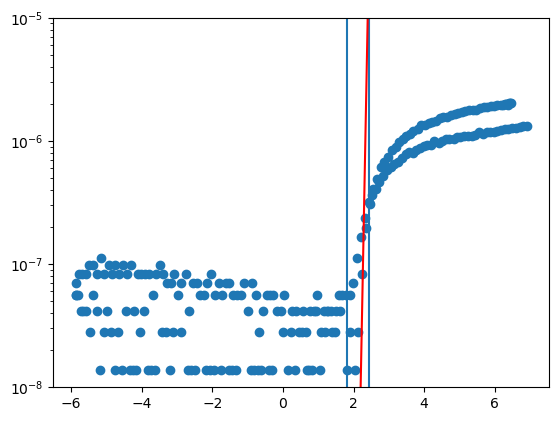

In [ ]:
plt.scatter(iv['V'], np.abs(iv['I0']))
# x = np.linspace(data.Vf(), data.VP(), 100)
# y = np.logspace(-7.5, -6.5, 15)
# plt.scatter(x, y)
plt.axvline(data.Vf())
plt.axvline(data.VP())
plt.axline((2.2, 1 * 10**(-8)), slope = 15, c = 'r')
plt.yscale('log')
plt.ylim(10**(-8), 10**(-5))

In [ ]:
# Redefining constants after execution state reset
k_B = 1.38e-23  # Boltzmann constant in J/K
e = 1.602e-19  # Elementary charge in C

# Given slope of ln(I) vs. V plot
slope = 8  # Slope = 1 / (kT_e)

# Compute electron temperature
T_e_calculated = 1 / (slope * k_B / e)

T_e_calculated


1451.086956521739